<ipython-input-5-eccfb6b523c8>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize='25')
<ipython-input-5-eccfb6b523c8>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize='27')
<ipython-input-5-eccfb6b523c8>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize='25')
<ipython-input-5-eccfb6b523c8>:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize='27')


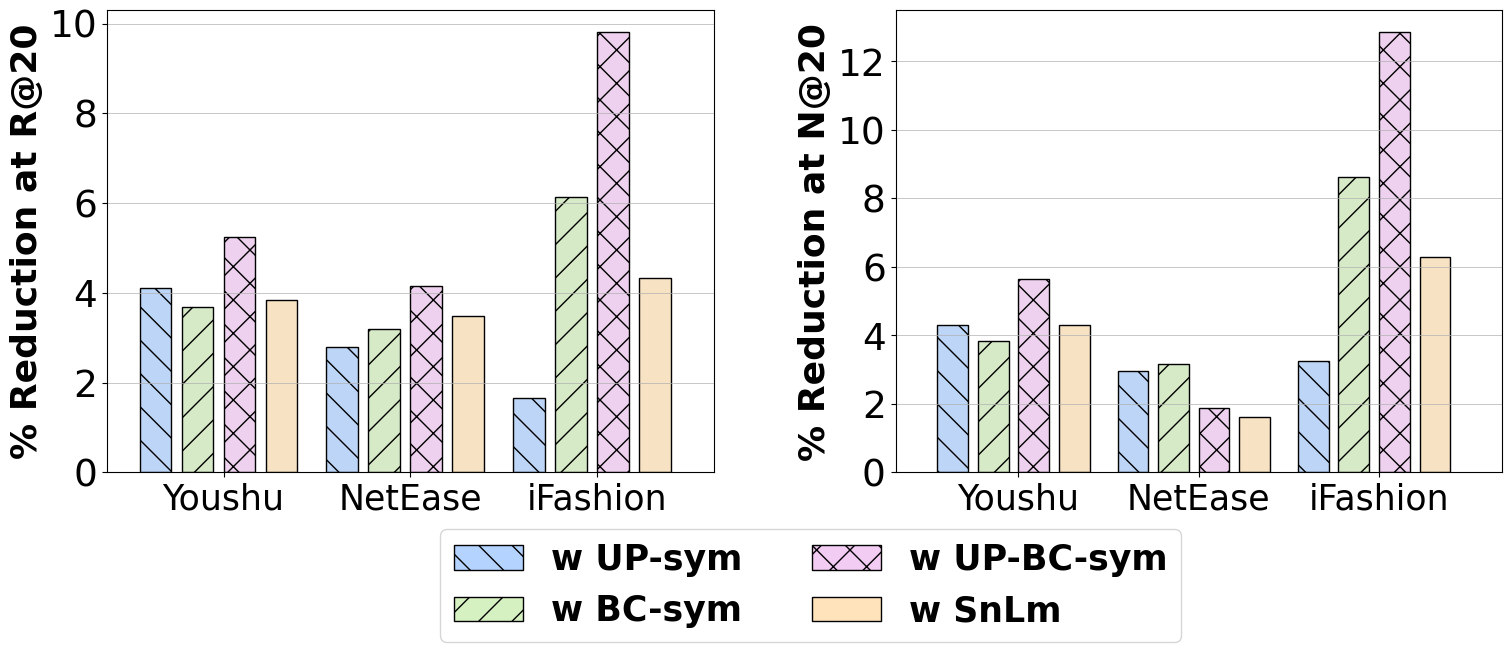

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Data for the first plot
data1 = {'Model': ['Youshu', 'NetEase', 'iFashion'],
         'w UP-sym': [4.11, 2.80, 1.66],
         'w BC-sym': [3.68, 3.19, 6.14],
         'w UP-BC-sym': [5.24, 4.16, 9.81],
         "w SnLm": [3.83, 3.48, 4.32]
        }

# Data for the second plot
data2 = {'Model': ['Youshu', 'NetEase', 'iFashion'],
         'w UP-sym': [4.29, 2.96, 3.24],
         'w BC-sym': [3.84, 3.17, 8.62],
         'w UP-BC-sym': [5.65, 1.88, 12.85],
         "w SnLm": [4.30, 1.60, 6.30]
        }
colors = ["#B4D4FF", "#D5F0C1",  "#F3CCF3", "#FFE3BB"]
# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Melt the DataFrames for better visualization with Seaborn
df_melted1 = pd.melt(df1, id_vars='Model', var_name='Ablation model', value_name='Percentage')
df_melted2 = pd.melt(df2, id_vars='Model', var_name='Ablation model', value_name='Percentage')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for the first subplot
barplot1 = sns.barplot(ax=axes[0], x='Model', y='Percentage', hue='Ablation model', data=df_melted1, dodge=0.15, palette=colors, width=0.9)

# Adding hatching to the bars
hatches = ['\\', '/', 'x', '']
hatch_dict1 = dict(zip(df_melted1['Ablation model'].unique(), hatches))

# Adding hatching to the bars in the first subplot
for bar, hatch in zip(barplot1.patches, df_melted1['Ablation model']):
    bar.set_hatch(hatch_dict1[hatch])
    bar.set_width(0.17)
    bar.set_edgecolor('black')

# Set labels and title for the first subplot
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize='25')
axes[0].set_xlabel('', fontsize='28')
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize='27')
axes[0].set_ylabel('% Reduction at R@20', fontweight='bold', fontsize='26')
barplot1.margins(x=0.06)

# Plot for the second subplot
barplot2 = sns.barplot(ax=axes[1], x='Model', y='Percentage', hue='Ablation model', data=df_melted2, dodge=0.15, palette=colors, width=0.9)

# Adding hatching to the bars in the second subplot
hatches = ['\\', '/', 'x', '']
hatch_dict2 = dict(zip(df_melted2['Ablation model'].unique(), hatches))

for bar, hatch in zip(barplot2.patches, df_melted2['Ablation model']):
    bar.set_hatch(hatch_dict2[hatch])
    bar.set_width(0.17)
    bar.set_edgecolor('black')

# Set labels and title for the second subplot
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize='25')
axes[1].set_xlabel('', fontsize='28', fontweight="bold")
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize='27')
axes[1].set_ylabel('% Reduction at N@20', fontweight='bold', fontsize='26')

barplot2.margins(x=0.08)

# Add horizontal grid lines to the second subplot
axes[1].grid(axis='y',which='major', linestyle='-',  linewidth=0.5)
axes[0].grid(axis='y', which='major',linestyle='-',  linewidth=0.5)


# Create custom legends using Patch for each unique hatch and color
legend1_handles = [Patch(facecolor=color, edgecolor='black', hatch=hatch_dict1[hatch]) for color, hatch in zip(colors, df_melted1['Ablation model'].unique())]
legend2_handles = [Patch(facecolor=color, edgecolor='black', hatch=hatch_dict2[hatch]) for color, hatch in zip(colors, df_melted2['Ablation model'].unique())]

# Add legend to the first subplot
legend1 = axes[0].legend(legend1_handles, df_melted1['Ablation model'].unique(), title='', fontsize='10', prop={"weight": "bold", "size": 20}, bbox_to_anchor=(0.35, 0.68))
legend1.remove()
# Add legend to the second subplot
legend2 = axes[1].legend(legend2_handles, df_melted2['Ablation model'].unique(), title='', fontsize='10', prop={"weight": "bold", "size": 25}, bbox_to_anchor=(0.5, -0.085), loc='upper right', ncol=2)

# Adjust layout
plt.subplots_adjust(wspace=0.3)

# Save the combined plots to PDF
plt.savefig('combined_plots_asym.pdf', bbox_inches='tight')

# Show the plots (optional)
plt.show()
